What is the National Survey of Children’s Health (NSCH)? The NSCH is a national survey funded and directed by the Health Resources and Services Administration’s Maternal and Child Health Bureau (HRSA MCHB) that provides rich data on multiple, intersecting aspects of children’s health and well-being – including physical and mental health, access to and quality of health care, and the child’s family, neighborhood, school, and social context.

What is the purpose of the National Survey of Children’s Health? The NSCH is designed to produce national and state-level data on the physical and emotional health of children 0 - 17 years old in the United States. Additionally, the NSCH provides estimates for 19 Title V Maternal and Child Health Services Block Grant National Outcome and Performance Measures, and data for each state’s Title V needs assessment.

Who sponsors and conducts the National Survey of Children’s Health? The NSCH is conducted by the U.S. Census Bureau on behalf of the U.S. Department of Health and Human Services, HRSA MCHB. The U.S. Census Bureau oversees the NSCH’s sampling plan and administration by web and mail. They also collect the data and create the sampling weights. Additional funding for specific questions on the 2020 survey was provided by: Centers for Disease Control and Prevention (CDC), National Center on Birth Defects and Developmental Disabilities (NCBDDD), United States Department of Agriculture (USDA), Food and Nutrition Service.

Who were the participants in the National Survey of Children’s Health? Households were randomly sampled and contacted by mail in order to identify those with one or more children under 18 years old. In households with more than one child only one was randomly selected to be the subject of the survey.

The survey oversampled children with special health care needs and children 0-5 years of age. For the 2020 NSCH, a total of 42,777 surveys were completed nationally for children between the ages of 0-17 years. State range 644 to 3,039. The weighted Overall Response Rate was 42.4%. Survey data were weighted to represent the population of non-institutionalized children ages 0-17 who live in housing units nationally and in each state.

How were data for the survey collected?

Households received a mailed invitation asking an adult in the household who is familiar with the child’s health and health care (usually a parent) to complete a short screener questionnaire (via web or paper). The screener asked participants to identify all children ages 0-17 living in the household. If a child (or children) was reported to live in the household, participants who chose to respond online were immediately directed to a more detailed, age-specific topical questionnaire for one randomly selected child. Participants could also request a paper copy of the screener and topical questionnaire if they did not wish to complete it online. The NSCH screener and topical questionnaires were available in both English and in Spanish.

Pre-survey screener: Once information on all children is gathered via the screener, one child from the household is randomly selected. The remaining questions of the survey pertain to this randomly selected child.

What topics are asked about in the survey?

• Child and family demographics • Children’s physical and mental health status, including health conditions and functional difficulties • Health insurance status, adequacy and type of coverage • Access to and use of health care services • Medical home • Transition to adult care • Early childhood-specific information (0-5 years) • Middle childhood and adolescent-specific information (6-17 years) • Family health and activities • Impact of child’s health on family • Parental perceptions of neighborhood and community characteristics

Are data from the NSCH available to the public? • The Data Resource Center for Child and Adolescent Health (DRC) website (www.childhealthdata.org) provides quick, easy, hands-on access to 2020 NSCH survey data. The DRC’s interactive data query (www.childhealthdata.org/browse/survey) allows users to instantly access the data and compare national and state-level findings among children of different ages, race/ethnicity, income levels, health status, and many more subgroups.

Interpretation of results

The respondents to the NSCH are parents or guardians who best know the child’s health. However, the results are weighted to reflect the population of children and youth ages 0–17, not parents or families. Thus, results are reported in terms of children/youth, even if the question refers to the parents or family. For example, when reporting on maternal health status, it is correct to say: “…percentage of children whose mothers are in excellent or very good health,” NOT “…percentage of mothers who are in excellent or very good health….”

Additionally, it is good to keep in mind that the condition-specific information in this survey is based on parent reports, not clinical diagnosis. Height and weight information used to calculate the Body Mass Index (BMI)-for-age indicator is also derived from parent reports, not biometric measurements.

Please pay careful attention to the valid denominator of responders to specific questions when interpreting results for this survey. Although most of the questions were asked for all children ages 0–17, some questions of the survey targeted specific age groups: ages 0–5, 3-5, 6–17, 10-17, and 12-17 years. In several parts of the survey, follow-up questions were asked only if parents gave a specific response to an earlier question.

CodeBook link: https://www.census.gov/data-tools/demo/uccb/nschdict

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import statistics
import numpy as np

In [2]:
# Load the NSCH dataset into a pandas DataFrame
nsch_data = pd.read_csv('2020 NSCH_Topical_CAHMI_DRC_Dataset.csv')

To define a binary variable for the presence or absence of ADHD I use the four variables K2Q31A, K2Q31B, K2Q31C, and K2Q31D
I followed the following steps:

Start with K2Q31A, which asks whether the child has ever been diagnosed with attention-deficit/hyperactivity disorder (ADHD). Create a binary variable called "ADHD_diagnosis" that is coded as 1 if the answer to K2Q31A is "yes" and 0 if the answer is "no".

Next, use K2Q31B to refine the ADHD diagnosis variable based on whether the child currently has ADHD. Create a binary variable called "ADHD_current" that is coded as 1 if the answer to K2Q31B is "yes" and 0 if the answer is "no" or "not sure".

Use K2Q31C to further refine the ADHD variable based on the severity of the child's symptoms. Create a binary variable called "ADHD_severity" that is coded as 1 if the answer to K2Q31C indicates that the child has "moderate" or "severe" ADHD symptoms and 0 if the answer indicates "mild" symptoms or no ADHD.

Finally, use K2Q31D to include information about whether the child is currently taking medication for ADHD. Create a binary variable called "ADHD_medication" that is coded as 1 if the answer to K2Q31D is "yes" and 0 if the answer is "no" or "not sure".

To combine these variables into a single binary variable, you can take the logical OR of each variable, indicating the presence of ADHD if any of the variables are positive. The resulting variable would be coded as 1 if ADHD_diagnosis = 1 OR ADHD_current = 1 OR ADHD_severity = 1 OR ADHD_medication = 1, and 0 otherwise.

Note that this approach assumes that each of the four variables is measuring a distinct aspect of ADHD and that each variable is equally important for defining the presence or absence of ADHD. Depending on your research question and goals, you may need to adjust the definition of the binary variable or use a different approach altogether.

Prevalence of ADD/ADHD, age 3-17 years (ADHDind_20)
Does this child currently have Attention Deficit Disorder (ADD) or Attention-Deficit/Hyperactivity Disorder (ADHD), age 3-17 years?


Survey instrument item number for children 0-5 years: A30; for children 6-11 years: A30; for children 12-17 years: A30
Variable in public use data file:
K2Q31A; K2Q31B


This measure is derived from responses to two questions: 
whether parents were ever told by a health care provider that the child has Attention Deficit Disorder/Attention Deficit Hyperactivity Disorder (ADD/ADHD) (K2Q31A); and, if the response to the previous question is "Yes", whether the child currently has the condition (K2Q31B). Respondents were grouped according to whether they currently have ADD/ADHD.


COMPUTE ADHDind_20= 999.

IF K2Q31A = 2 ADHDind_20= 1.
IF K2Q31A = 1 and K2Q31B = 2 ADHDind_20= 2.
IF K2Q31A = 1 and K2Q31B = 1 ADHDind_20= 3.
IF K2Q31A=99 or K2Q31B=99 ADHDind_20= 99.
IF SC_AGE_YEARS < 3 ADHDind_20= 95.
VARIABLE LABELS ADHDind_20 "Indicator 2.7: Children who currently have Attention Deficit Disorder (ADD) or Attention-Deficit Hyperactivity Disorder (ADHD), age 3-17 years".
VALUE LABELS ADHDind_20
1 "Does not currently have condition"
2 "Ever told, but does not currently have condition"
3 "Currently has condition"
99 "Missing"
95 "Children age 0-2 years".
MISSING VALUES ADHDind_20(95,99).

In [3]:
print(nsch_data['ADHDind_20'])

0         1
1         1
2        95
3         1
4         1
         ..
42772     3
42773     1
42774     3
42775     1
42776     3
Name: ADHDind_20, Length: 42777, dtype: int64


In [4]:
nsch_data["ADHDind_20"].value_counts()

1     32940
95     5377
3      3880
2       319
99      261
Name: ADHDind_20, dtype: int64

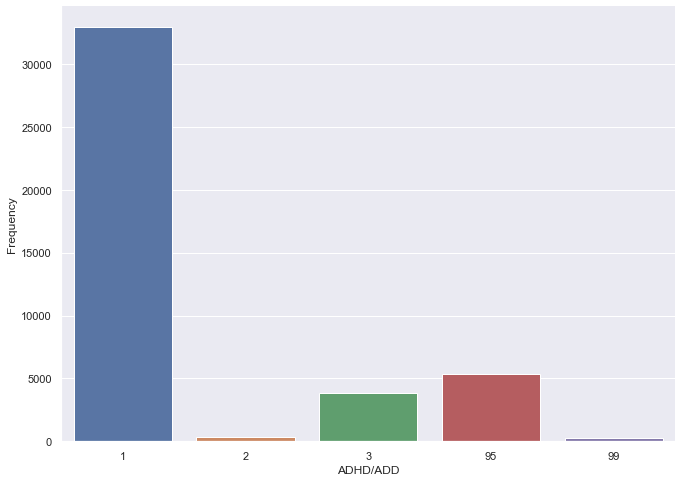

In [5]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=nsch_data,
              x='ADHDind_20')
plt.xlabel('ADHD/ADD')
plt.ylabel('Frequency')
plt.title('')
sns.despine()
plt.show()

In [6]:
# create a new binary variable for ADHD
nsch_data["ADHD_binary"] = nsch_data["ADHDind_20"].replace({1: 0, 2: 0, 3: 1})

# drop missing values
nsch_data = nsch_data[(nsch_data["ADHDind_20"] != 95) & (nsch_data["ADHDind_20"] != 99)]

# check the value counts for the new binary variable
print(nsch_data["ADHD_binary"].value_counts())

0    33259
1     3880
Name: ADHD_binary, dtype: int64


To predict the ADHD_binary variable, I select variables that are likely to be associated with ADHD or that could potentially confound the relationship between other predictors and ADHD. Here are the variables I considered:
Age of child (SC_AGE_YEARS)
Sex of child (K2Q01)
Race/ethnicity (K2Q05A-K2Q05D)
Parental education (K6Q38A-K6Q38D)
Family income (K6Q45A-K6Q45G)
Number of adults in household (K6Q31A-K6Q31C)
Number of children in household (K6Q32A-K6Q32C)
Primary language spoken in home (K6Q36)
Whether child has health insurance (K6Q52)
Whether child has a usual source of care (K6Q53)
Parental report of child's overall health status (K6Q28)
Parental report of child's mental health status (K6Q29)
Parental report of child's emotional difficulties (K6Q27)
Parental report of child's behavior problems (K6Q26)
Whether child has ever been diagnosed with a developmental delay, disability, or special need (K2Q17)
Whether child has ever been diagnosed with anxiety or depression (K2Q41)
Whether child has ever been diagnosed with a learning disability (K2Q40)
Whether child has ever been diagnosed with asthma (K2Q51)
Whether child has ever been diagnosed with ADHD (ADHDind_20)
Whether child is currently taking medication for ADHD (ADHDMed_20)
Whether child has received behavioral treatment for ADHD (ADHDBehTreat_20)

In [7]:
nsch_data['AdultEduc_20'].value_counts()


4    22596
3     8519
2     5008
1     1016
Name: AdultEduc_20, dtype: int64

In [8]:
df = nsch_data[['ADHD_binary','BrstStop_20','MOMAGE','FIPSST','TOTKIDS_R', 'SC_AGE_YEARS', 'SC_SEX', 'SC_RACE_R', 'AdultEduc_20', 'povlev4_20', 'famstruct5_20', 'FAMCOUNT', 'HOUSE_GEN', 'HHLanguage_20', 'instype_20', 'autism_20', 'learning_20', 'bully_20', 'BedTime_20', 'anxiety_20', 'asthma_20', 'behavior_20', 'depress_20', 'speech_20']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37139 entries, 0 to 42776
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ADHD_binary    37139 non-null  int64
 1   BrstStop_20    37139 non-null  int64
 2   MOMAGE         37139 non-null  int64
 3   FIPSST         37139 non-null  int64
 4   TOTKIDS_R      37139 non-null  int64
 5   SC_AGE_YEARS   37139 non-null  int64
 6   SC_SEX         37139 non-null  int64
 7   SC_RACE_R      37139 non-null  int64
 8   AdultEduc_20   37139 non-null  int64
 9   povlev4_20     37139 non-null  int64
 10  famstruct5_20  37139 non-null  int64
 11  FAMCOUNT       37139 non-null  int64
 12  HOUSE_GEN      37139 non-null  int64
 13  HHLanguage_20  37139 non-null  int64
 14  instype_20     37139 non-null  int64
 15  autism_20      37139 non-null  int64
 16  learning_20    37139 non-null  int64
 17  bully_20       37139 non-null  int64
 18  BedTime_20     37139 non-null  int64
 19  anxi

In [10]:
df[['ADHD_binary', 'BrstStop_20','FIPSST', 'SC_SEX','SC_RACE_R', 'AdultEduc_20', 'povlev4_20', 'famstruct5_20', 'HOUSE_GEN', 'HHLanguage_20', 'instype_20', 'autism_20', 'learning_20', 'bully_20', 'BedTime_20', 'anxiety_20', 'asthma_20', 'behavior_20', 'depress_20', 'speech_20'  ]] = df[['ADHD_binary', 'BrstStop_20','FIPSST', 'SC_SEX','SC_RACE_R', 'AdultEduc_20', 'povlev4_20', 'famstruct5_20', 'HOUSE_GEN', 'HHLanguage_20', 'instype_20', 'autism_20', 'learning_20', 'bully_20', 'BedTime_20', 'anxiety_20', 'asthma_20', 'behavior_20', 'depress_20', 'speech_20'  ]].astype('category')


/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_1046/2877162577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['ADHD_binary', 'BrstStop_20','FIPSST', 'SC_SEX','SC_RACE_R', 'AdultEduc_20', 'povlev4_20', 'famstruct5_20', 'HOUSE_GEN', 'HHLanguage_20', 'instype_20', 'autism_20', 'learning_20', 'bully_20', 'BedTime_20', 'anxiety_20', 'asthma_20', 'behavior_20', 'depress_20', 'speech_20'  ]] = df[['ADHD_binary', 'BrstStop_20','FIPSST', 'SC_SEX','SC_RACE_R', 'AdultEduc_20', 'povlev4_20', 'famstruct5_20', 'HOUSE_GEN', 'HHLanguage_20', 'instype_20', 'autism_20', 'learning_20', 'bully_20', 'BedTime_20', 'anxiety_20', 'asthma_20', 'behavior_20', 'depress_20', 'speech_20'  ]].astype('category')


In [11]:
df.dtypes

ADHD_binary      category
BrstStop_20      category
MOMAGE              int64
FIPSST           category
TOTKIDS_R           int64
SC_AGE_YEARS        int64
SC_SEX           category
SC_RACE_R        category
AdultEduc_20     category
povlev4_20       category
famstruct5_20    category
FAMCOUNT            int64
HOUSE_GEN        category
HHLanguage_20    category
instype_20       category
autism_20        category
learning_20      category
bully_20         category
BedTime_20       category
anxiety_20       category
asthma_20        category
behavior_20      category
depress_20       category
speech_20        category
dtype: object

In [12]:
# create dummy variables for the BrstStop_20  column
BrstStop_20_dummies = pd.get_dummies(df['BrstStop_20'], prefix='BrstStop_20')

# create dummy variables for the FIPSST column
FIPSST_dummies = pd.get_dummies(df['FIPSST'], prefix='FIPSST')

# create dummy variables for the SC_SEX column
SC_SEX_dummies = pd.get_dummies(df['SC_SEX'], prefix='SC_SEX')


# create dummy variables for the BrstStop_20  column
SC_RACE_R_dummies = pd.get_dummies(df['SC_RACE_R'], prefix='SC_RACE_R')

# create dummy variables for the AdultEduc_20 column
AdultEduc_20_dummies = pd.get_dummies(df['AdultEduc_20'], prefix='AdultEduc_20')

# create dummy variables for the povlev4_20 column
povlev4_20_dummies = pd.get_dummies(df['povlev4_20'], prefix='povlev4_20')


# create dummy variables for the famstruct5_20 column
famstruct5_20_dummies = pd.get_dummies(df['famstruct5_20'], prefix='famstruct5_20')

# create dummy variables for the HOUSE_GEN column
HOUSE_GEN_dummies = pd.get_dummies(df['HOUSE_GEN'], prefix='HOUSE_GEN')

# create dummy variables for the HHLanguage_20 column
HHLanguage_20_dummies = pd.get_dummies(df['HHLanguage_20'], prefix='HHLanguage_20')


# create dummy variables for the instype_20 column
instype_20_dummies = pd.get_dummies(df['instype_20'], prefix='instype_20')

# create dummy variables for the autism_20 column
autism_20_dummies = pd.get_dummies(df['autism_20'], prefix='autism_20')

# create dummy variables for the learning_20 column
learning_20_dummies = pd.get_dummies(df['learning_20'], prefix='learning_20')



# create dummy variables for the bully_20 column
bully_20_dummies = pd.get_dummies(df['bully_20'], prefix='bully_20')

# create dummy variables for the BedTime_20 column
BedTime_20_dummies = pd.get_dummies(df['BedTime_20'], prefix='BedTime_20')

# create dummy variables for the anxiety_20 column
anxiety_20_dummies = pd.get_dummies(df['anxiety_20'], prefix='anxiety_20')


# create dummy variables for the asthma_20 column
asthma_20_dummies = pd.get_dummies(df['asthma_20'], prefix='asthma_20')

# create dummy variables for the behavior_20 column
behavior_20_dummies = pd.get_dummies(df['behavior_20'], prefix='behavior_20')

# create dummy variables for the depress_20 column
depress_20_dummies = pd.get_dummies(df['depress_20'], prefix='depress_20')

# create dummy variables for the speech_20 column
speech_20_dummies = pd.get_dummies(df['speech_20'], prefix='speech_20')




In [13]:

# concatenate the dummy variables with the original DataFrame
df = pd.concat([df, BrstStop_20_dummies, FIPSST_dummies, SC_SEX_dummies, SC_RACE_R_dummies, AdultEduc_20_dummies, povlev4_20_dummies, famstruct5_20_dummies, HOUSE_GEN_dummies, HHLanguage_20_dummies, instype_20_dummies, autism_20_dummies, learning_20_dummies, bully_20_dummies, BedTime_20_dummies, anxiety_20_dummies, asthma_20_dummies, behavior_20_dummies, depress_20_dummies, speech_20_dummies], axis=1)



In [14]:
# drop the original categorical columns
df.drop(['BrstStop_20', 'FIPSST', 'SC_SEX', 'SC_RACE_R', 'AdultEduc_20', 'povlev4_20', 'famstruct5_20', 'HOUSE_GEN', 'HHLanguage_20', 'instype_20', 'autism_20', 'learning_20', 'bully_20', 'BedTime_20', 'anxiety_20', 'asthma_20', 'behavior_20', 'depress_20', 'speech_20'], axis=1, inplace=True)



In [15]:
df.head()

,ADHD_binary,MOMAGE,TOTKIDS_R,SC_AGE_YEARS,FAMCOUNT,BrstStop_20_1,BrstStop_20_2,BrstStop_20_90,BrstStop_20_95,BrstStop_20_99,...,behavior_20_3,behavior_20_99,depress_20_1,depress_20_2,depress_20_3,depress_20_99,speech_20_1,speech_20_2,speech_20_3,speech_20_99
0,0,26,2,3,4,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,31,1,14,2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,29,2,15,4,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,24,2,16,4,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,24,3,17,5,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [16]:
c = list(df.columns)
c

['ADHD_binary',
 'MOMAGE',
 'TOTKIDS_R',
 'SC_AGE_YEARS',
 'FAMCOUNT',
 'BrstStop_20_1',
 'BrstStop_20_2',
 'BrstStop_20_90',
 'BrstStop_20_95',
 'BrstStop_20_99',
 'FIPSST_1',
 'FIPSST_2',
 'FIPSST_4',
 'FIPSST_5',
 'FIPSST_6',
 'FIPSST_8',
 'FIPSST_9',
 'FIPSST_10',
 'FIPSST_11',
 'FIPSST_12',
 'FIPSST_13',
 'FIPSST_15',
 'FIPSST_16',
 'FIPSST_17',
 'FIPSST_18',
 'FIPSST_19',
 'FIPSST_20',
 'FIPSST_21',
 'FIPSST_22',
 'FIPSST_23',
 'FIPSST_24',
 'FIPSST_25',
 'FIPSST_26',
 'FIPSST_27',
 'FIPSST_28',
 'FIPSST_29',
 'FIPSST_30',
 'FIPSST_31',
 'FIPSST_32',
 'FIPSST_33',
 'FIPSST_34',
 'FIPSST_35',
 'FIPSST_36',
 'FIPSST_37',
 'FIPSST_38',
 'FIPSST_39',
 'FIPSST_40',
 'FIPSST_41',
 'FIPSST_42',
 'FIPSST_44',
 'FIPSST_45',
 'FIPSST_46',
 'FIPSST_47',
 'FIPSST_48',
 'FIPSST_49',
 'FIPSST_50',
 'FIPSST_51',
 'FIPSST_53',
 'FIPSST_54',
 'FIPSST_55',
 'FIPSST_56',
 'SC_SEX_1',
 'SC_SEX_2',
 'SC_RACE_R_1',
 'SC_RACE_R_2',
 'SC_RACE_R_3',
 'SC_RACE_R_4',
 'SC_RACE_R_5',
 'SC_RACE_R_7',
 'Adult

In [17]:
y = df["ADHD_binary"]

X = df[['ADHD_binary',
 'MOMAGE',
 'TOTKIDS_R',
 'SC_AGE_YEARS',
 'FAMCOUNT',
 'BrstStop_20_1',
 'BrstStop_20_2',
 'BrstStop_20_90',
 'BrstStop_20_95',
 'BrstStop_20_99',
 'FIPSST_1',
 'FIPSST_2',
 'FIPSST_4',
 'FIPSST_5',
 'FIPSST_6',
 'FIPSST_8',
 'FIPSST_9',
 'FIPSST_10',
 'FIPSST_11',
 'FIPSST_12',
 'FIPSST_13',
 'FIPSST_15',
 'FIPSST_16',
 'FIPSST_17',
 'FIPSST_18',
 'FIPSST_19',
 'FIPSST_20',
 'FIPSST_21',
 'FIPSST_22',
 'FIPSST_23',
 'FIPSST_24',
 'FIPSST_25',
 'FIPSST_26',
 'FIPSST_27',
 'FIPSST_28',
 'FIPSST_29',
 'FIPSST_30',
 'FIPSST_31',
 'FIPSST_32',
 'FIPSST_33',
 'FIPSST_34',
 'FIPSST_35',
 'FIPSST_36',
 'FIPSST_37',
 'FIPSST_38',
 'FIPSST_39',
 'FIPSST_40',
 'FIPSST_41',
 'FIPSST_42',
 'FIPSST_44',
 'FIPSST_45',
 'FIPSST_46',
 'FIPSST_47',
 'FIPSST_48',
 'FIPSST_49',
 'FIPSST_50',
 'FIPSST_51',
 'FIPSST_53',
 'FIPSST_54',
 'FIPSST_55',
 'FIPSST_56',
 'SC_SEX_1',
 'SC_SEX_2',
 'SC_RACE_R_1',
 'SC_RACE_R_2',
 'SC_RACE_R_3',
 'SC_RACE_R_4',
 'SC_RACE_R_5',
 'SC_RACE_R_7',
 'AdultEduc_20_1',
 'AdultEduc_20_2',
 'AdultEduc_20_3',
 'AdultEduc_20_4',
 'povlev4_20_1',
 'povlev4_20_2',
 'povlev4_20_3',
 'povlev4_20_4',
 'famstruct5_20_1',
 'famstruct5_20_2',
 'famstruct5_20_3',
 'famstruct5_20_4',
 'famstruct5_20_5',
 'famstruct5_20_99',
 'HOUSE_GEN_1',
 'HOUSE_GEN_2',
 'HOUSE_GEN_3',
 'HOUSE_GEN_4',
 'HOUSE_GEN_99',
 'HHLanguage_20_1',
 'HHLanguage_20_2',
 'HHLanguage_20_99',
 'instype_20_1',
 'instype_20_2',
 'instype_20_3',
 'instype_20_4',
 'instype_20_99',
 'autism_20_1',
 'autism_20_2',
 'autism_20_3',
 'autism_20_99',
 'learning_20_1',
 'learning_20_2',
 'learning_20_3',
 'learning_20_99',
 'bully_20_1',
 'bully_20_2',
 'bully_20_3',
 'bully_20_4',
 'bully_20_5',
 'bully_20_90',
 'bully_20_99',
 'BedTime_20_1',
 'BedTime_20_2',
 'BedTime_20_3',
 'BedTime_20_4',
 'BedTime_20_99',
 'anxiety_20_1',
 'anxiety_20_2',
 'anxiety_20_3',
 'anxiety_20_99',
 'asthma_20_1',
 'asthma_20_2',
 'asthma_20_3',
 'asthma_20_99',
 'behavior_20_1',
 'behavior_20_2',
 'behavior_20_3',
 'behavior_20_99',
 'depress_20_1',
 'depress_20_2',
 'depress_20_3',
 'depress_20_99',
 'speech_20_1',
 'speech_20_2',
 'speech_20_3',
 'speech_20_99']]

<AxesSubplot:>

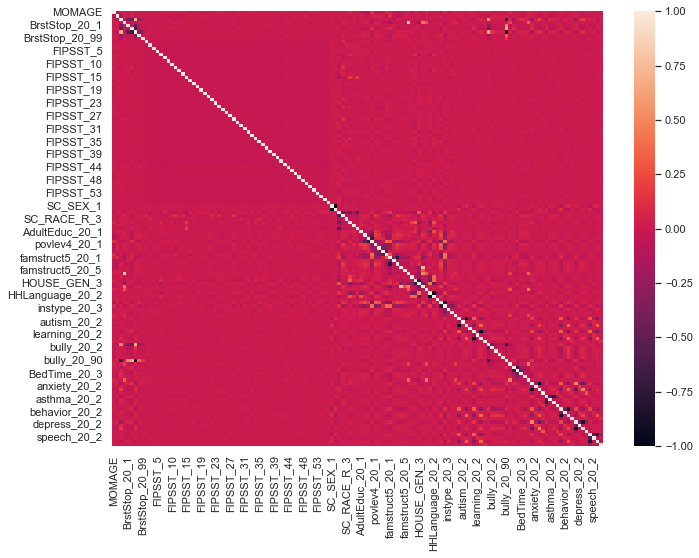

In [18]:
sns.heatmap(X.corr())

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.50, random_state=123)

In [ ]:
y_test.hist()


<AxesSubplot:>

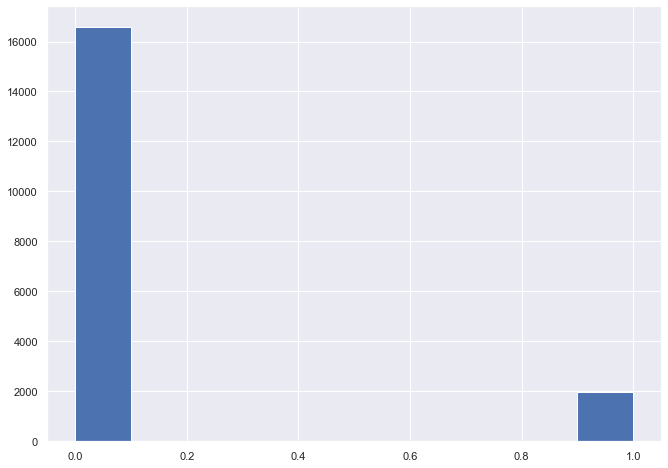

In [22]:
y_train.hist()

In [23]:
logreg_clf = LogisticRegression(max_iter=10000)

In [24]:
logreg_clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [25]:
pred=logreg_clf.predict(X_test)

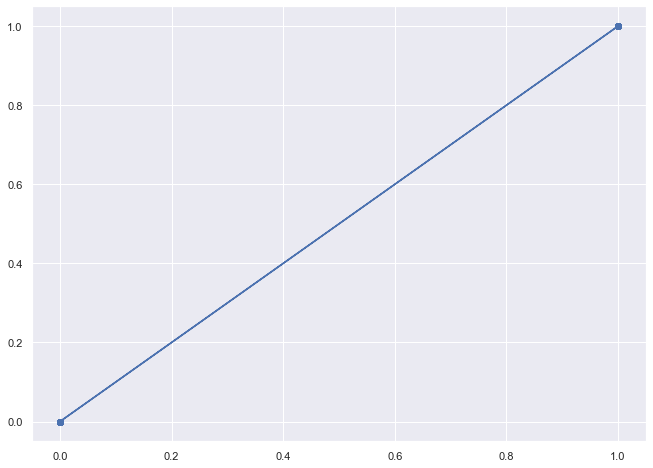

In [26]:
plt.scatter(y_test, pred)
plt.plot(y_test, y_test)

In [27]:
print(accuracy_score(pred, y_test))

1.0


In [28]:
print(confusion_matrix(pred, y_test))

[[16683     0]
 [    0  1887]]


In [29]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [30]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
pred=KNN_model.predict(X_test)

In [32]:
print(accuracy_score(pred, y_test))

0.9218093699515347


In [33]:
print(confusion_matrix(pred, y_test))

[[16637  1406]
 [   46   481]]


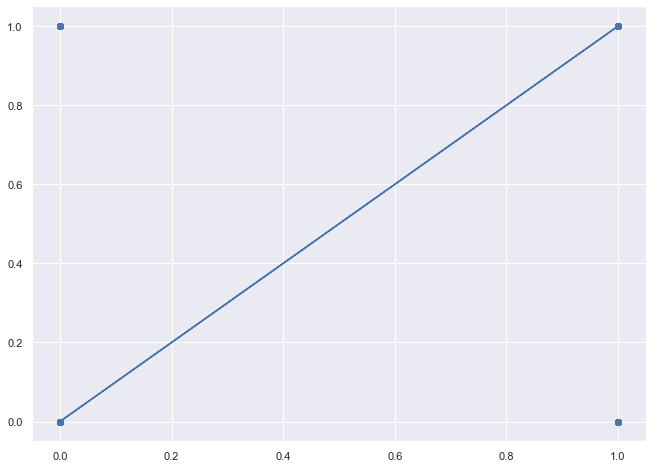

In [34]:
plt.scatter(y_test, pred)
plt.plot(y_test, y_test)

In [35]:
SVC_model= SVC()
SVC_model.fit(X_train,y_train)
pred=SVC_model.predict(X_test)
print(accuracy_score(pred, y_test))

0.9945072697899838


In [36]:
print(confusion_matrix(pred, y_test))

[[16683   102]
 [    0  1785]]


In [37]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X, y)
pred=clf.predict(X_test)
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

1.0
[[16683     0]
 [    0  1887]]


TypeError: 'property' object is not subscriptable

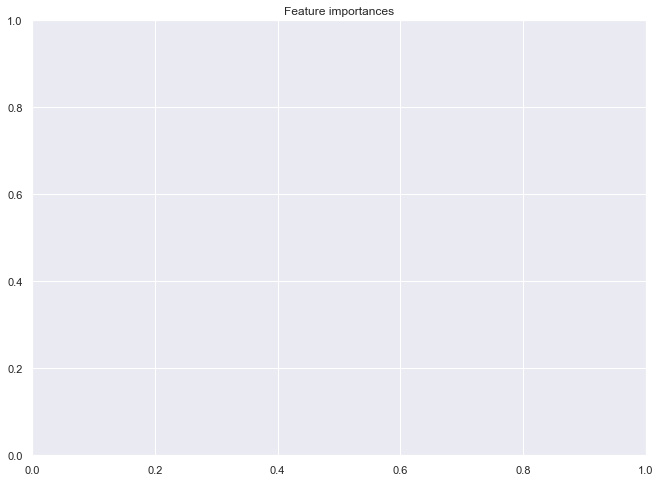

In [38]:
# Get feature importances and sort them in descending order
from sklearn.ensemble import RandomForestClassifier as rf

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [ ]:
importances.getter

In [ ]:
feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()